In [14]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dent = pd.read_csv("../output.sgc-ani/denticola.ani.csv")
dent['organism'] = "denticola"
ging = pd.read_csv("../output.sgc-ani/gingivalis.ani.csv")
ging['organism'] = "gingivalis"

bact = pd.read_csv("../output.sgc-ani/bacteroides.ani.csv")
bact['organism'] = "bacteroides"

In [34]:
# imp columns

# query_bp = unique query hashes (n hashes * scaled)
# match_bp = unique match hashes (n hashes * scaled)
# intersect_bp = num matched hashes (n hashes * scaled)
# f_query_match = match containment
# f_match_query = query containment

In [35]:
anidf = pd.concat([dent,ging,bact])

In [36]:
anidf.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match_filename,match_name,match_md5,match_bp,query_filename,...,moltype,scaled,query_n_hashes,query_abundance,query_containment_ani,match_containment_ani,average_containment_ani,max_containment_ani,potential_false_negative,organism
0,2000,0.000818,0.105263,0.105263,0.000824,GCA_000147075.1_ASM14707v1_genomic.fna.gz.cont...,nbhd:CP001698.1 Spirochaeta thermophila DSM 61...,1871b705,19000,denticola/GCA_000147075.1_ASM14707v1_genomic.f...,...,DNA,1000,2428,False,0.795260,0.929952,0.862606,0.929952,True,denticola
1,3000,0.002538,0.176471,0.176471,0.002568,GCA_000217655.1_ASM21765v1_genomic.fna.gz.cont...,nbhd:CP002103.1 Treponema paraluiscuniculi Cun...,024b8504,17000,denticola/GCA_000217655.1_ASM21765v1_genomic.f...,...,DNA,1000,1168,False,0.824976,0.945582,0.885279,0.945582,True,denticola
2,1000,0.000789,0.166667,0.166667,0.000792,GCA_000222305.1_ASM22230v1_genomic.fna.gz.cont...,nbhd:CP002746.1 Borreliella bissettii DN127 ch...,1119f053,6000,denticola/GCA_000222305.1_ASM22230v1_genomic.f...,...,DNA,1000,1263,False,0.794245,0.943840,0.869043,0.943840,True,denticola
3,1000,0.001050,0.125000,0.125000,0.001058,GCA_000239475.1_ASM23947v1_genomic.fna.gz.cont...,nbhd:CP003151.1 Borrelia garinii BgVir chromos...,9318bdb5,8000,denticola/GCA_000239475.1_ASM23947v1_genomic.f...,...,DNA,1000,945,False,0.801712,0.935122,0.868417,0.935122,True,denticola
4,1000,0.000299,0.166667,0.166667,0.000299,GCA_000242595.3_ASM24259v3_genomic.fna.gz.cont...,"nbhd:CP003282.1 Spirochaeta africana DSM 8902,...",66d566bc,6000,denticola/GCA_000242595.3_ASM24259v3_genomic.f...,...,DNA,1000,3343,False,0.769694,0.943840,0.856767,0.943840,True,denticola


In [37]:
anidf["query_containment_ani"]

0     0.795260
1     0.824976
2     0.794245
3     0.801712
4     0.769694
        ...   
29    0.814749
30    0.755038
31    0.756198
32    0.856692
33    0.778667
Name: query_containment_ani, Length: 103, dtype: float64

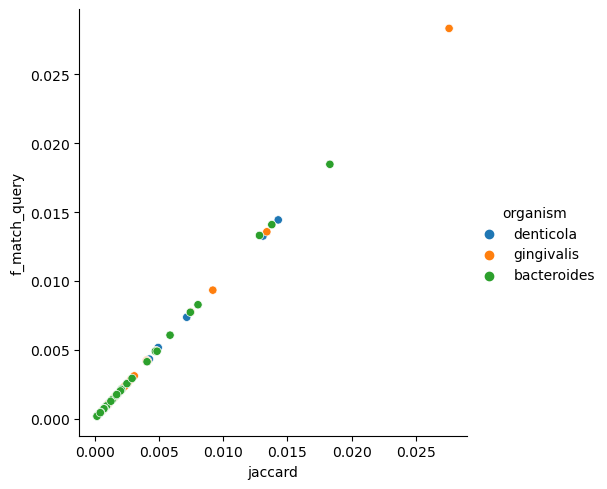

In [69]:
# jaccard vs query_containment
g = sns.relplot(data=anidf, x="jaccard", y="f_match_query", kind = "scatter", hue ="organism")
#g.set(xscale='log')

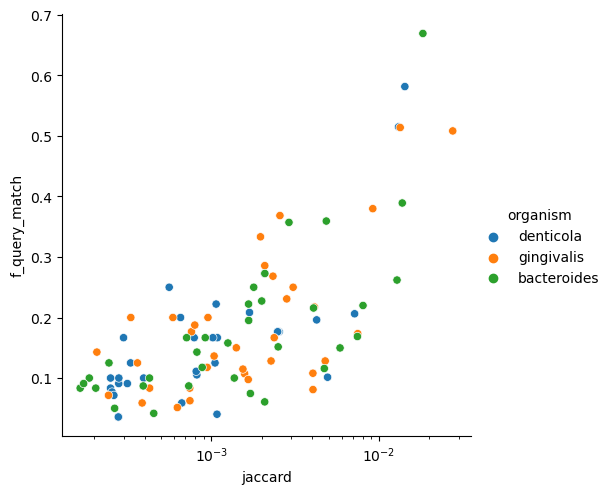

In [76]:
g = sns.relplot(data=anidf, x="jaccard", y="f_query_match", kind = "scatter", hue ="organism")
g.set(xscale='log')


/Users/tessa/opt/miniconda3/envs/nb-2022-sgc-ani/lib/python3.10/site-packages/seaborn/axisgrid.py:38: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


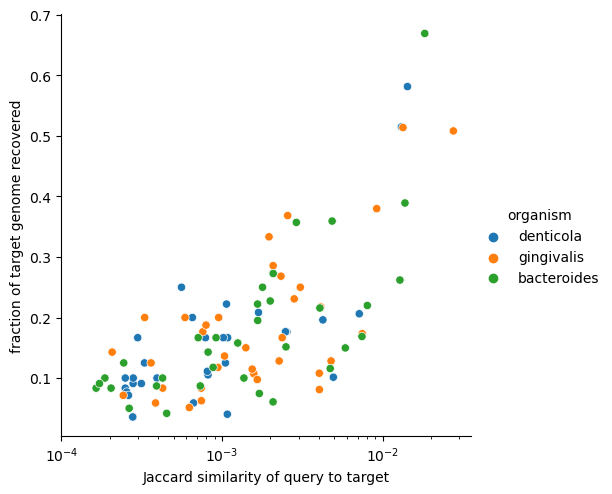

In [74]:
# jaccard vs match_containment
g = sns.relplot(data=anidf, x="jaccard", y="f_query_match", kind = "scatter", hue ="organism")
g.set_xlabels("Jaccard similarity of query to target")
g.set_ylabels("fraction of target genome recovered")
g.set(xscale='log', xlim=(1e-4, 0))

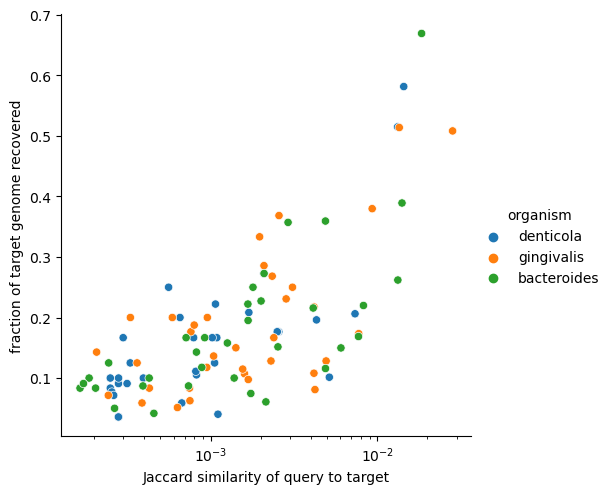

In [64]:
# jaccard vs match_containment
g = sns.relplot(data=anidf, x="f_match_query", y="f_query_match", kind = "scatter", hue ="organism")
g.set_xlabels("Jaccard similarity of query to target")
g.set_ylabels("fraction of target genome recovered")
g.set(xscale='log')

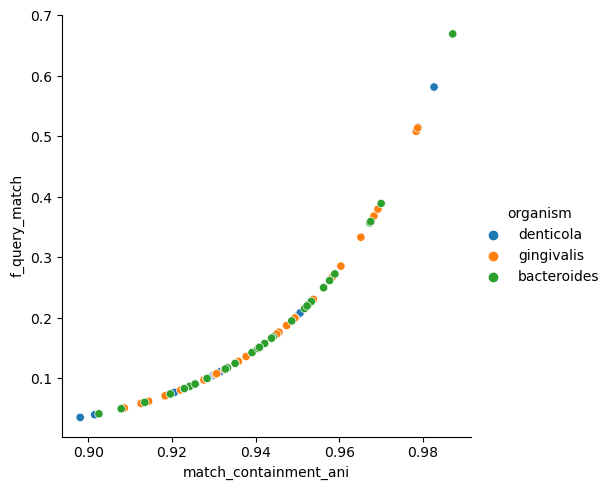

In [58]:
# jaccard vs match_containment
g = sns.relplot(data=anidf, x="match_containment_ani", y="f_query_match", kind = "scatter", hue ="organism")
#g.set(xscale='log')

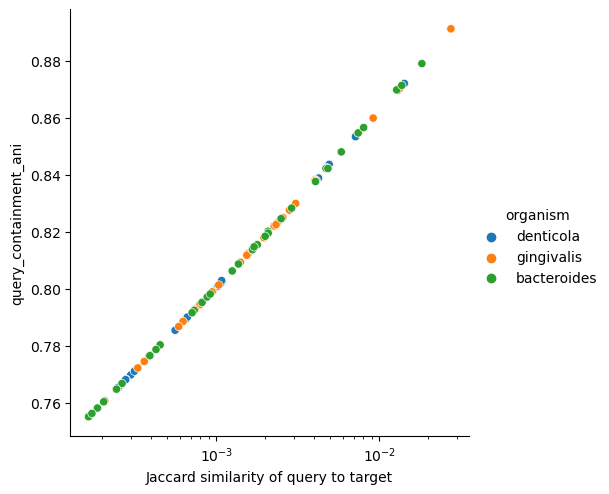

In [50]:
# jaccard vs query_containment_ANI
g = sns.relplot(data=anidf, x="jaccard", y="query_containment_ani", kind = "scatter", hue ="organism")
g.set(xscale='log')
g.set_xlabels("Jaccard similarity of query to target")

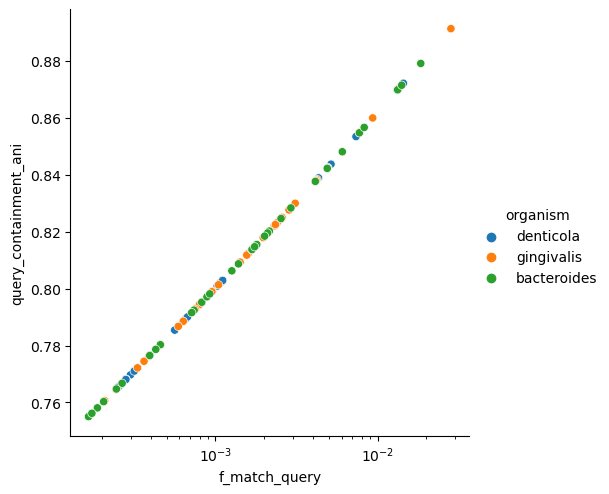

In [44]:
g = sns.relplot(data=anidf, x="f_match_query", y="query_containment_ani", kind = "scatter", hue ="organism")
g.set(xscale='log')